<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Machine_Learning/Tree_based/03-01-02-08-10-tree-based-models-bagging-grf-local-linear-forest-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.8.10 Local Linear Forest

A **Local Linear Forest (LLF)**, as implemented in the `{grf}` package in R, is an advanced extension of the random forest framework that combines the flexibility of random forests with local linear regression to improve prediction accuracy, particularly for smooth relationships between features and outcomes. It is designed to refine the predictions of a standard random forest by incorporating local linear corrections, making it especially effective for regression tasks where the underlying relationship varies smoothly across the feature space. Below, I’ll explain the concept, its implementation in `{grf}`, and how it differs from standard regression forests.


## Overview

A Local Linear Forest builds on the generalized random forest framework by adding a **local linear correction** step to the predictions made by a random forest. While a standard random forest predicts outcomes by averaging the response values in a leaf (a step function), LLF refines these predictions by fitting a local linear regression model at each prediction point, using the forest’s similarity weights to define the "neighborhood" of that point. This approach captures smooth trends in the data while retaining the random forest’s ability to handle non-linear relationships and high-dimensional feature spaces.



### Key features

- `Random Forest Foundation`: Like other random forests, LLF uses an ensemble of decision trees trained on random subsets of data and features.
- `Local Linear Correction`: For each prediction, LLF fits a weighted linear regression model, where weights are derived from the forest’s tree structure (based on how often data points share leaves with the target point).
- `Honest Splitting`: Supports honest estimation (separating data for tree splits and leaf estimates) to reduce bias.
- `Smooth Predictions`: Produces smoother predictions than standard random forests, which are piecewise constant within leaves.


### How Local Linear Forests Work in `{grf}`

The `ll_regression_forest()` function in `{grf}` implements Local Linear Forests. Here’s how it works:

1. Input Data

   - A feature matrix $X$ (predictors) and a vector $Y$ (continuous outcome).
   - Optional parameters like `num.trees`, `honesty`, `ll.lambda` (regularization for the linear correction), and `enable.ll.split` (to incorporate local linear splitting).

2. Tree Construction

   - Each tree is grown using a bootstrap sample of the data and a random subset of features for splits.
   - Splits are typically chosen to minimize mean squared error (MSE), but `{grf}` allows for local linear splitting criteria (`enable.ll.split = TRUE`), which optimize splits based on local linear fits.
   - If `honesty = TRUE`, data is split into two parts: one for building the tree structure and another for estimating leaf values.

3. Local Linear Correction

   - For a new data point $x$, the forest computes **similarity weights** based on how often $x$ shares a leaf with training points across all trees. These weights define a local neighborhood around $x$.
   
   - A weighted linear regression is fitted using the training data, with weights from the forest, to predict the outcome at $x$. The regression model is typically of the form:
  
  $$ \hat{y}(x) = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \cdots + \hat{\beta}_p x_p $$
  
  where $\hat{\beta}$coefficients are estimated locally, and `ll.lambda` controls ridge regularization to prevent overfitting.

4. Prediction

   - The final prediction combines the forest’s structure with the local linear fit, producing a smoother estimate than the step-wise predictions of a standard random forest.

5. Output

   - Predictions for new data points.
   - Optional outputs like variable importance or variance estimates.


### Advantages of Local Linear Forests

1. `Smoother Predictions`: LLF produces predictions that vary smoothly with features, unlike the step-like predictions of standard random forests, making it better suited for smooth relationships.

2. `Improved Accuracy`: The local linear correction can improve predictive performance, especially in regions where the relationship between features and outcomes is approximately linear.

3. `Flexibility`: Combines the non-linear modeling of random forests with the local linearity of regression, balancing complexity and smoothness.

4. `Honest Estimation`: Inherits `{grf}`’s honest splitting, reducing bias in predictions.

5. `Robustness`: Handles high-dimensional data and non-linear relationships effectively, like standard random forests.

### Limitations`

1. `Computational Cost`: The local linear correction step increases computation time compared to standard regression forests, especially for large datasets or many predictions.

2. `Regularization Sensitivity`: The `ll.lambda` parameter (ridge penalty) needs careful tuning to avoid overfitting or underfitting the local linear models.

3. `Assumes Local Smoothness`: LLF performs best when the outcome varies smoothly with features. If the relationship is highly non-linear or discontinuous, a standard regression forest may be sufficient.

4. `Complexity`: Interpreting the local linear coefficients can be challenging compared to the simpler averaging in standard forests.

### Applications

- `Economics`: Predicting outcomes like housing prices or income, where smooth relationships with features (e.g., location, size) are expected.
- `Environmental Science`: Modeling smooth spatial or temporal trends, such as temperature or pollution levels.
- `Healthcare`: Predicting continuous health metrics (e.g., blood pressure) that vary smoothly with patient characteristics.
- `Any Regression Task`: Where the outcome is expected to have locally smooth behavior with respect to predictors.

### Key Differences from Standard Regression Forest

| **Aspect**                     | **Standard Regression Forest** (`regression_forest`) | **Local Linear Forest** (`ll_regression_forest`) |
|--------------------------------|----------------------------------------------------|-----------------------------------------------|
| `Prediction Method`          | Averages outcomes in the leaf where a point falls. | Fits a local linear regression using forest weights. |
| `Smoothness`                 | Piecewise constant (step function within leaves).  | Smooth predictions via local linear adjustments. |
| `Splitting Criterion`        | Minimizes MSE for the outcome.                    | Can use local linear splitting (`enable.ll.split`). |
| `Use Case`                   | General regression tasks with complex, non-smooth relationships. | Regression tasks where the outcome varies smoothly with features. |
| `Computational Cost`         | Lower (simpler prediction step).                  | Higher (due to local linear regression per prediction). |
| `Regularization`             | No explicit regularization in prediction.          | Uses ridge regularization (`ll.lambda`) in local fits. |





## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314979 sha256=44a00c98e93a7f5f2c3eaae70b13b203d55af61b291567bd4cb649899129cbd6
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Multi-task Regression Forest with R

To illustrate, let’s use the Boston Housing dataset to predict two related outcomes: `medv` (median housing price) and `tax` (property tax rate). We’ll fit a `multi_regression_forest()`, predict on a test set, and evaluate performance.




### Load and Check Required Libraries

In [3]:
%%R
packages <- c('tidyverse',
              'plyr',
              'grf',
              'rdd',
              'survival',
              'mlbench',
              'Metrics'
         )

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      plyr       grf       rdd  survival   mlbench   Metrics 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 


### Load R Packages

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))


### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:rdd"       "package:Formula"   "package:AER"      
 [4] "package:car"       "package:carData"   "package:lmtest"   
 [7] "package:zoo"       "package:sandwich"  "package:Metrics"  
[10] "package:mlbench"   "package:survival"  "package:grf"      
[13] "package:plyr"      "package:lubridate" "package:forcats"  
[16] "package:stringr"   "package:dplyr"     "package:purrr"    
[19] "package:readr"     "package:tidyr"     "package:tibble"   
[22] "package:ggplot2"   "package:tidyverse" "package:tools"    
[25] "package:stats"     "package:graphics"  "package:grDevices"
[28] "package:utils"     "package:datasets"  "package:methods"  
[31] "package:base"     


### Load and Prepare the Dataset


In [5]:
%%R
# Load Boston Housing dataset
data(BostonHousing, package = "mlbench")
# Split data into training (70%) and test (30%) sets
# Set seed for reproducibility
set.seed(123)
n <- nrow(BostonHousing)
train_idx <- sample(1:n, size = 0.7 * n)
train_data <- BostonHousing[train_idx, ]
test_data <- BostonHousing[-train_idx, ]


### Prepare Features and Target Variable

In [6]:
%%R
# Prepare features (X) and target (Y)
X_train <- model.matrix(~ . - medv, data = train_data)[, -1]  # Exclude medv, intercept
Y_train <- train_data$medv
X_test <- model.matrix(~ . - medv, data = test_data)[, -1]   # Exclude medv, intercept
Y_test <- test_data$medv

### Fit Local Linear Forest

We  will use `ll_regression_forest()` with 500 trees, `honesty = TRUE,` and a small ridge penalty (`ll.split.lambda = 0.01`) for the local linear correction. The `ll.split.lambda` parameter controls regularization to stabilize the local linear fits.

In [7]:
%%R
# Fit local linear forest
ll_rf <- ll_regression_forest(X_train, Y_train, num.trees = 500,
                              honesty = TRUE,
                              ll.split.lambda = 0.1)
print(ll_rf)

GRF forest object of type ll_regression_forest 
Number of trees: 500 
Number of training samples: 354 
Variable importance: 
    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.032 0.001 0.012 0.002 0.020 0.363 0.012 0.024 0.003 0.011 0.017 0.011 0.493 


### Predict on Test Set and Evaluate Model

In [9]:
%%R
# Predict on test set
predictions <- predict(ll_rf, X_test)$predictions

# Calculate RMSE and R-squared
rmse <- sqrt(mean((predictions - Y_test)^2))
sst <- sum((Y_test - mean(Y_test))^2)
sse <- sum((predictions - Y_test)^2)
r_squared <- 1 - sse / sst

# Print performance metrics
cat("Test Set RMSE:", rmse, "\n")
cat("Test Set R-squared:", r_squared, "\n")

Test Set RMSE: 4.277437 
Test Set R-squared: 0.7935353 


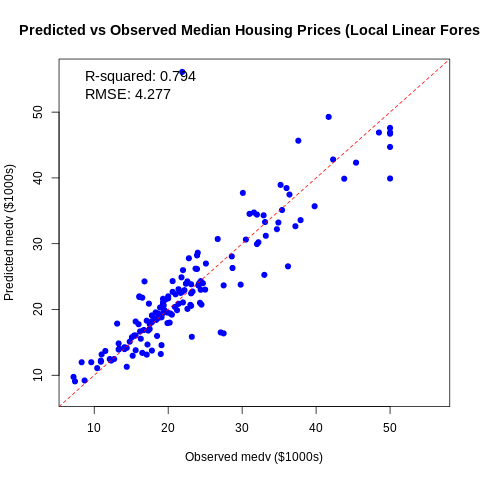

In [10]:
%%R
# Scatter plot of predicted vs observed values
plot(Y_test, predictions,
     main = "Predicted vs Observed Median Housing Prices (Local Linear Forest)",
     xlab = "Observed medv ($1000s)",
     ylab = "Predicted medv ($1000s)",
     pch = 19, col = "blue",
     xlim = range(c(Y_test, predictions)),
     ylim = range(c(Y_test, predictions)))
abline(0, 1, col = "red", lty = 2)  # Add 45-degree reference line
legend("topleft",
       legend = c(sprintf("R-squared: %.3f", r_squared),
                  sprintf("RMSE: %.3f", rmse)),
       bty = "n", cex = 1.2)


## Summary and Conclusion

Local Linear Forests (LLF) provide a powerful extension to traditional regression forests by incorporating local linear corrections, resulting in smoother predictions that better capture the underlying relationships in the data. In this tutorial, we demonstrated how to fit a Local Linear Forest model using the `{grf}` package in R, applied it to the Boston Housing dataset, and evaluated its performance using RMSE and R-squared metrics. The results showed that LLF can effectively model complex relationships while maintaining the flexibility and robustness of random forests. This makes LLF a valuable tool for regression tasks where smooth trends are expected.


## References

1. Friedberg, Rina, Julie Tibshirani, Susan Athey, and Stefan Wager. "Local Linear Forests". Journal of Computational and Graphical Statistics, 30(2), 2020.


2. [Local linear forest](https://grf-labs.github.io/grf/reference/ll_regression_forest.html)

